In [1]:
## Tested on Jupyter Notebook and Anaconda Environment ##
# Python: 3.7.13
# Tensorflow: 2.3.0 (Keras comes with this so no need ot install it separately)
# Matplotlib: 3.5.1
# Pandas: 1.3.5
# Seaborn: 0.1.1.2

# Import libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Create map of different fruit classes from subdirectory names in the train folder

# Training dataset dir
train_dir = "fruits_dataset/train"

Name=[]
for file in os.listdir(train_dir):
    Name+=[file]

# Create and print category map    
fruit_map = dict(zip(Name, [t for t in range(len(Name))]))
print(fruit_map)
r_fruit_map=dict(zip([t for t in range(len(Name))],Name)) 

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [3]:
# Alter data set
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)
                                
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Divide data sets into train and validation

train_generator = img_datagen.flow_from_directory(train_dir,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

# IDK why the validation set is the same as the train set.
valid_generator = img_datagen.flow_from_directory(train_dir,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13309 images belonging to 33 classes.
Found 3314 images belonging to 33 classes.


In [5]:
# Create the ANN layers

model = Sequential()

# First convolution and pooling layers
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolution and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolution and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolution and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Sixth convolution and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(256))
# Activation layer
model.add(Activation('relu'))
# Dropout layer to avoid overfitting
model.add(Dropout(0.5))

# Final output layer must match the number of classes (fruit categories)
model.add(Dense(len(fruit_map)))
model.add(Activation('softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [6]:
# Compile model and fit dataset to model

# Use adam optimizer
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train model
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                   epochs=20)

Epoch 1/20
415/415 [==============================] - 95s 229ms/step - loss: 2.2076 - accuracy: 0.2745 - val_loss: 0.9363 - val_accuracy: 0.6582
Epoch 2/20
415/415 [==============================] - 95s 229ms/step - loss: 0.8256 - accuracy: 0.6745 - val_loss: 0.4692 - val_accuracy: 0.8388
Epoch 3/20
415/415 [==============================] - 95s 229ms/step - loss: 0.4302 - accuracy: 0.8440 - val_loss: 0.7409 - val_accuracy: 0.8089
Epoch 4/20
415/415 [==============================] - 94s 226ms/step - loss: 0.2786 - accuracy: 0.9015 - val_loss: 0.1737 - val_accuracy: 0.9402
Epoch 5/20
415/415 [==============================] - 94s 227ms/step - loss: 0.1977 - accuracy: 0.9331 - val_loss: 0.1236 - val_accuracy: 0.9553
Epoch 6/20
415/415 [==============================] - 94s 228ms/step - loss: 0.1583 - accuracy: 0.9445 - val_loss: 0.1087 - val_accuracy: 0.9589
Epoch 7/20
415/415 [==============================] - 94s 227ms/step - loss: 0.1675 - accuracy: 0.9447 - val_loss: 0.0602 - val_ac

In [7]:
# Save trained model
model.save('fruit_model.h5')

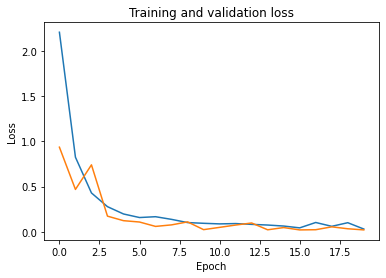

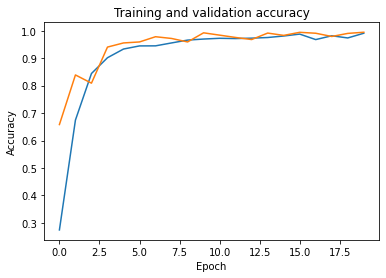

In [8]:
# Plot training history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()